# Projet Python

## Importation des librairies

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

## Construction du dataset

In [2]:
# Liste des features
with open('features.txt', 'r') as f:
    features = f.read().replace(" ", "").splitlines()

# Liste des activités pour la partie train
with open('y_train.txt', 'r') as f:
    y_train = f.read().splitlines()

# Liste des activités pour la partie test
with open('y_test.txt', 'r') as f:
    y_test = f.read().splitlines()

# Liste des sujets pour la partie train
with open('subject_id_train.txt', 'r') as f:
    subject_id_train = f.read().splitlines()

# Liste des sujets pour la partie test
with open('subject_id_test.txt', 'r') as f:
    subject_id_test = f.read().splitlines()
    
# Liste des noms des activités
labels = []
with open('activity_labels.txt', 'r') as f:
    for line in f:
        line = line.split()
        labels.append(line[1])

# On remplace le numéro des activités par leur nom
for i in range(len(y_train)):
    y_train[i] = labels[int(y_train[i])-1]
for i in range(len(y_test)):
    y_test[i] = labels[int(y_test[i])-1]

# Construction du DataFrame pour la partie train
x_train = pd.read_csv('X_train.txt', sep=" ", header=None)
x_train.columns = features
x_train['subject-id'] = subject_id_train

# Construction du DataFrame pour la partie test
x_test = pd.read_csv('X_test.txt', sep=" ", header=None)
x_test.columns = features
x_test['subject-id'] = subject_id_test

In [3]:
# On affiche le dataset train
x_train

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,subject-id
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,1
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,1
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,1
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,1
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020,30
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252,30
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071,30
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700,30


## Exploration des données

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2F14F958>,
      dtype=object)

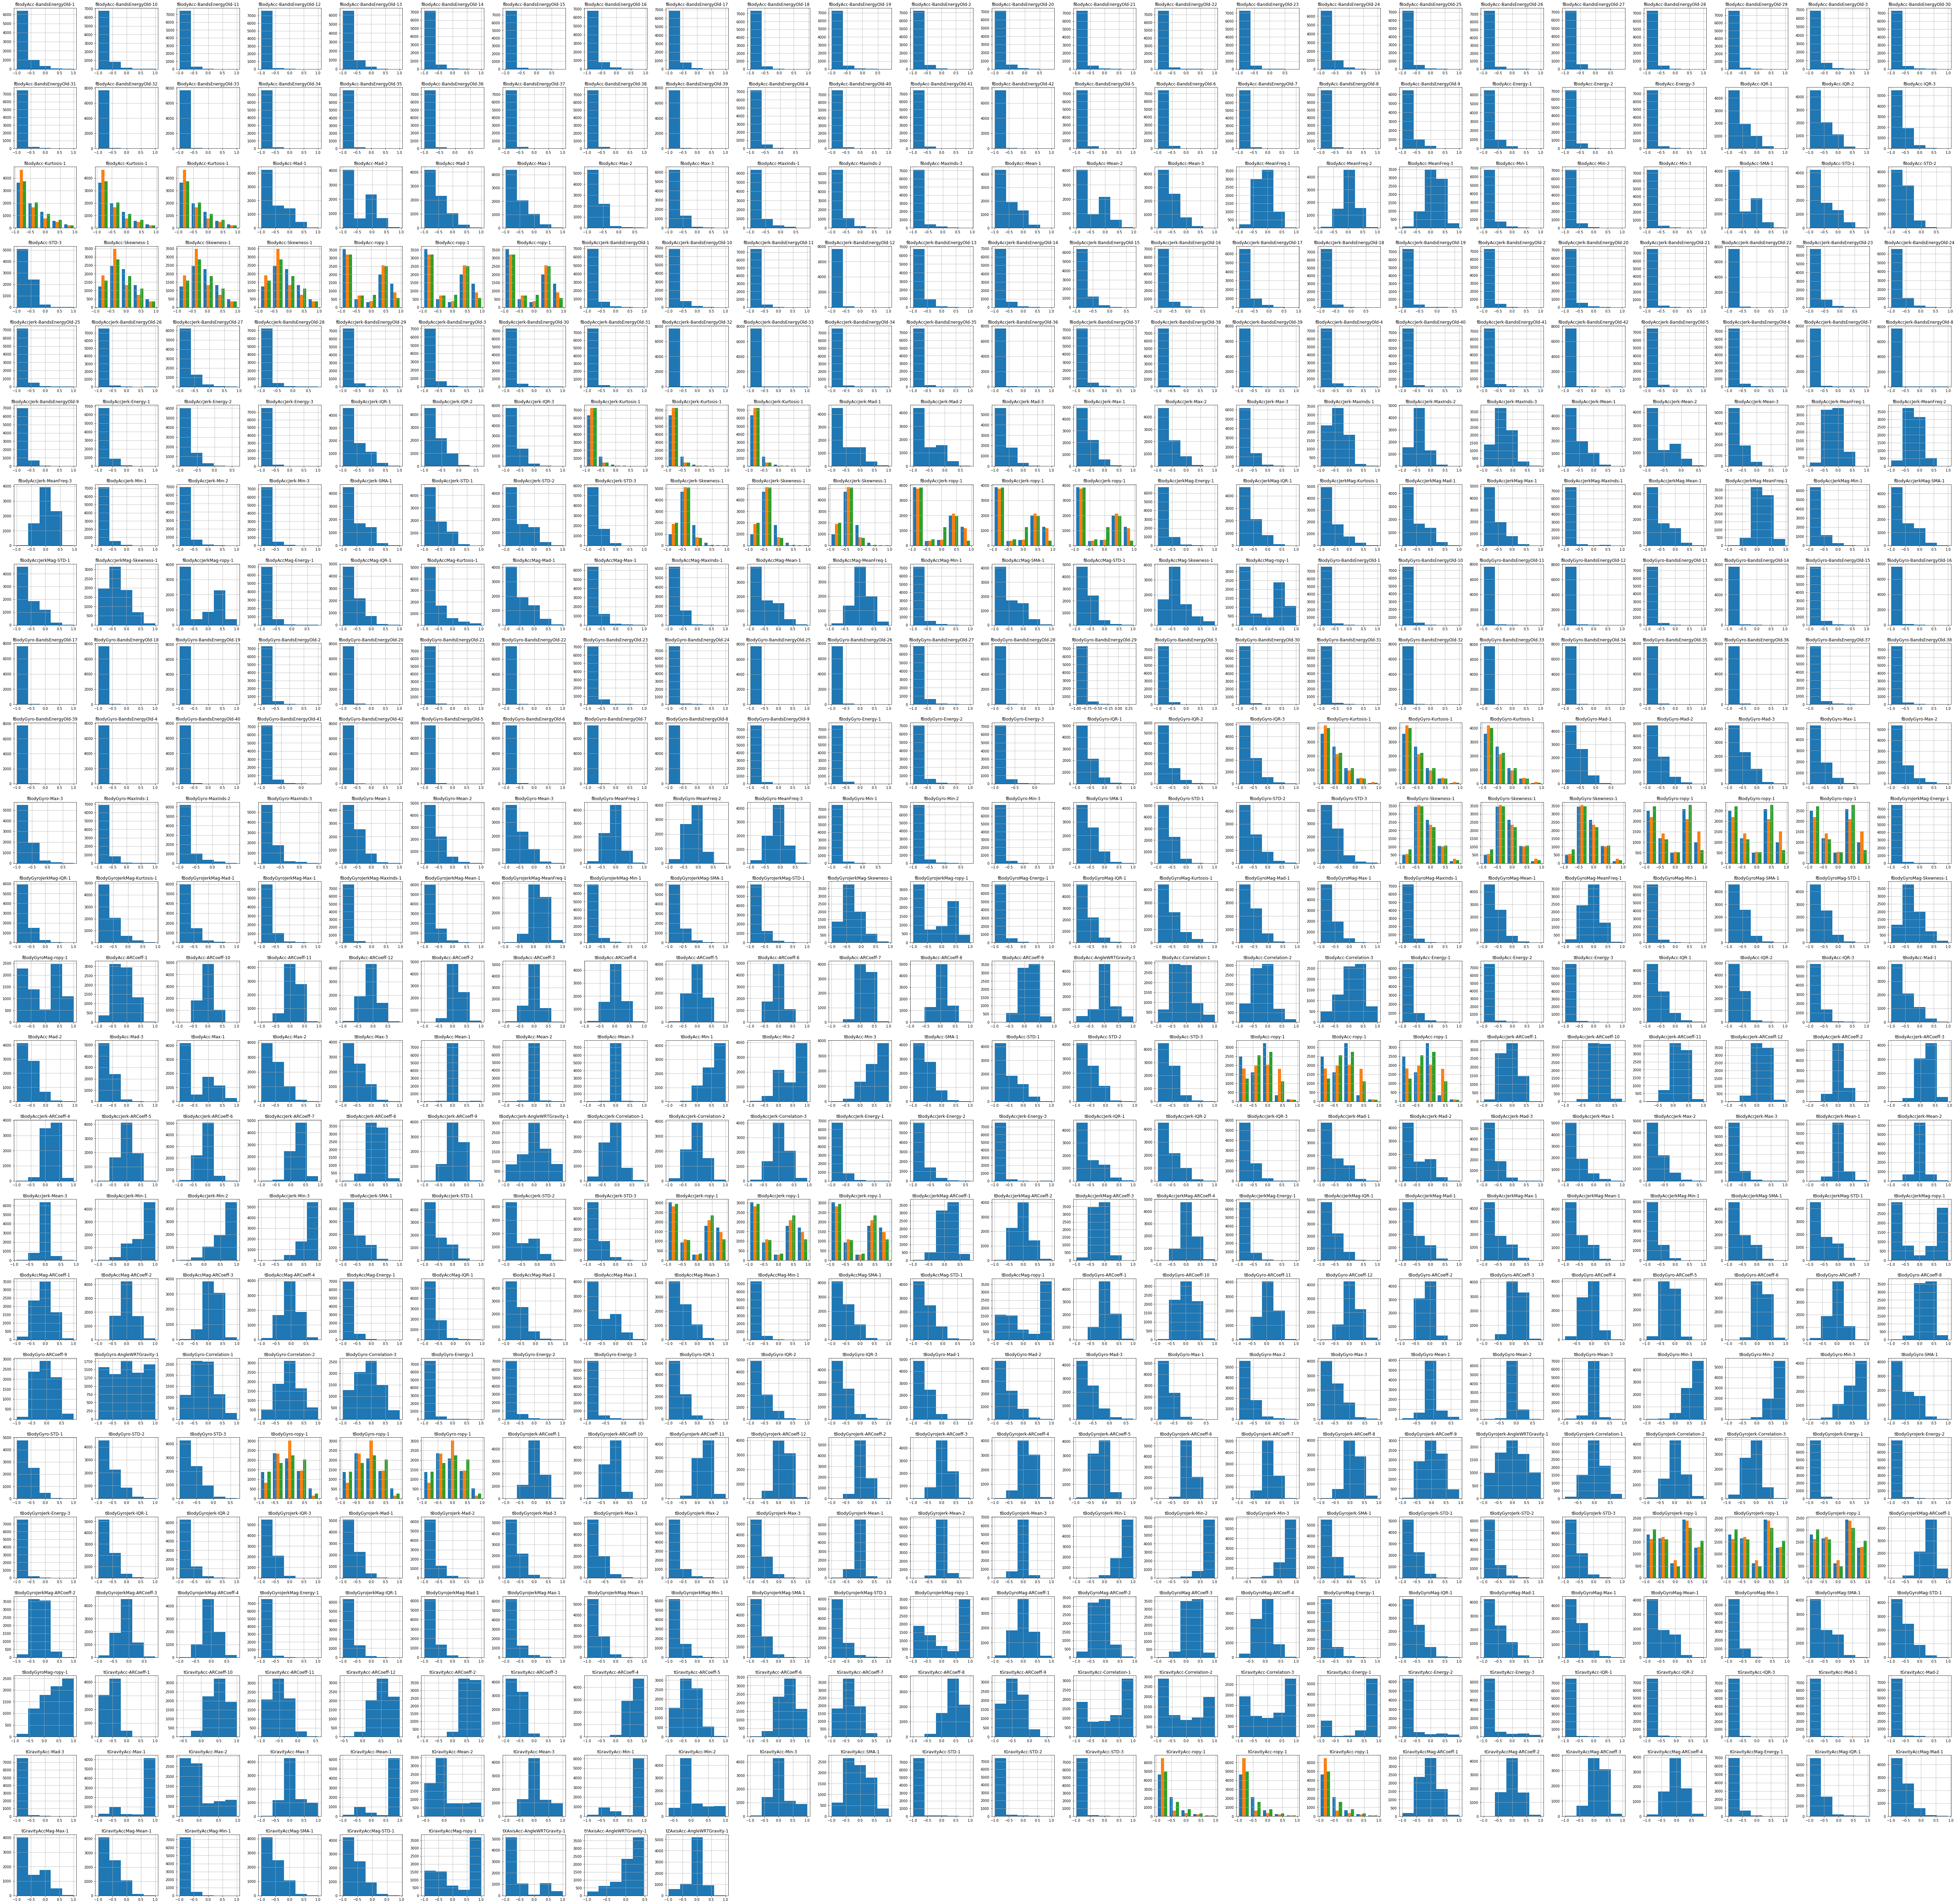

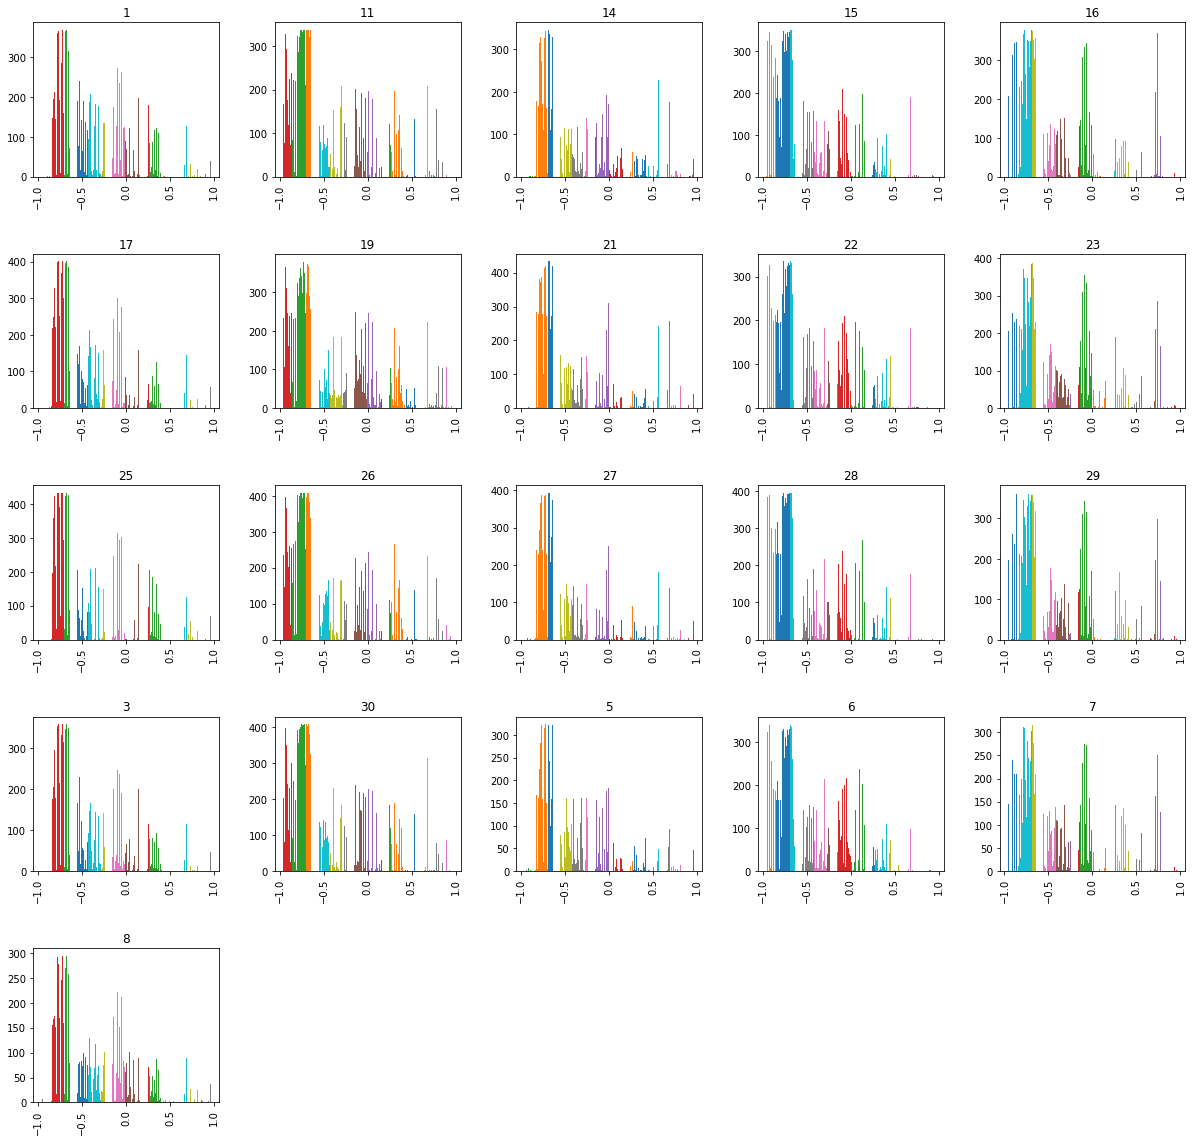

In [4]:
# Histogramme des fréquences de toutes les features (zoomer pour voir les graphiques en détail)
x_train.hist(bins=5, figsize=(100, 100))

# On groupe par ID des sujets
x_train.hist(bins=5, by='subject-id', figsize=(20, 20))

## Entraînement

### Régression linéaire

In [5]:
LR = LogisticRegression(max_iter=10000, random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
res = LR.predict(x_test)

# Précision
print(LR.score(x_test, y_test))

0.9452877925363694


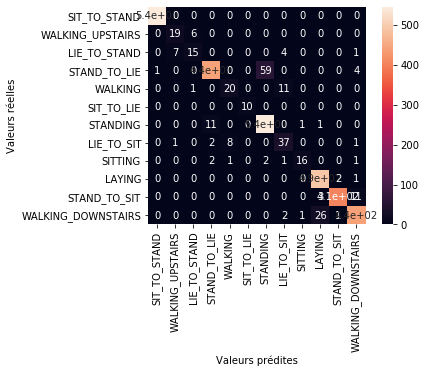

In [6]:
# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [7]:
# Importance des features
feature_importance = abs(LR.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
headers = ["Nom", "Score"]
values = sorted(zip(x_train.columns, feature_importance), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

Nom                                     Score
tGravityAcc-Energy-1             100
tGravityAcc-Min-1                 91.8012
tGravityAcc-Mean-1                91.6025
tGravityAcc-Max-1                 87.5404
tXAxisAcc-AngleWRTGravity-1       77.7379
tGravityAcc-Energy-2              66.9599
tGravityAcc-SMA-1                 48.7304
tBodyAcc-ropy-1                   37.2479
tBodyAcc-Correlation-1            34.9317
tGravityAcc-Energy-3              34.7845
tBodyAcc-ropy-1                   31.2711
tBodyGyroJerk-ropy-1              28.9
tBodyGyro-Correlation-1           27.8404
fBodyGyro-Kurtosis-1              26.324
tBodyAccJerk-Correlation-3        26.0476
tBodyAcc-Max-1                    25.5191
fBodyGyro-Skewness-1              24.3162
tBodyGyroJerk-ARCoeff-1           23.4908
tGravityAcc-Max-2                 23.461
tYAxisAcc-AngleWRTGravity-1       23.4473
tBodyGyroJerk-ARCoeff-3           22.6455
tBodyAcc-Correlation-3            21.9381
tGravityAcc-Mean-2                21.238

### SVM

In [8]:
SVM = svm.SVC(decision_function_shape="ovo", kernel='linear').fit(x_train, y_train)
res = SVM.predict(x_test)

# Précision
print(SVM.score(x_test, y_test))

0.9490828589500316


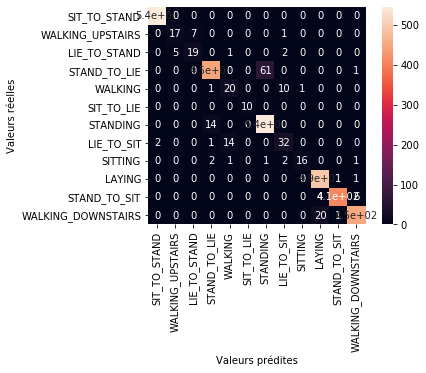

In [9]:
# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [10]:
# Importance des features
feature_importance = abs(SVM.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
headers = ["Nom", "Score"]
values = sorted(zip(x_train.columns, feature_importance), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

Nom                                     Score
tBodyAcc-ropy-1                  100
tBodyAcc-Mean-1                   72.769
tBodyAcc-Max-1                    68.7104
tBodyAcc-Correlation-1            65.9049
tGravityAcc-ropy-1                63.6944
tBodyAcc-Min-1                    61.6964
tBodyGyro-Correlation-3           58.6004
tBodyAcc-ropy-1                   58.5969
tBodyGyroJerk-ARCoeff-12          57.7414
tBodyAcc-ropy-1                   57.2613
tBodyGyro-ARCoeff-11              54.9473
fBodyAccJerk-MaxInds-3            53.5753
tBodyGyro-ARCoeff-12              53.3338
fBodyAccJerk-MaxInds-2            46.8697
tBodyAcc-Max-2                    44.5039
tGravityAcc-Max-1                 42.1075
tGravityAcc-Mean-1                41.2159
fBodyGyro-Kurtosis-1              39.914
fBodyGyro-Skewness-1              37.8727
tGravityAcc-SMA-1                 37.107
tBodyAccJerk-ARCoeff-4            35.4931
tBodyAcc-Min-2                    34.4789
tBodyAccJerk-ARCoeff-8            34.0

###  Random Forest

In [11]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_train, y_train)
res = RF.predict(x_test)

# Précision
print(RF.score(x_test, y_test))

0.9070208728652751


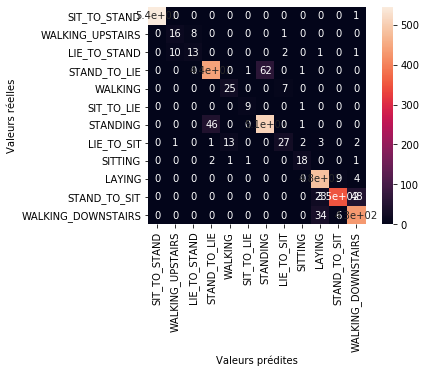

In [12]:
# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [13]:
# Importance des features
headers = ["Nom", "Score"]
values = sorted(zip(x_train.columns, RF.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

Nom                                    Score
tGravityAcc-Min-1                0.031057
tYAxisAcc-AngleWRTGravity-1      0.0269424
tGravityAcc-Mean-2               0.0264372
tGravityAcc-Max-1                0.0256513
tXAxisAcc-AngleWRTGravity-1      0.025403
tGravityAcc-Mean-1               0.0252161
tGravityAcc-Max-2                0.0241989
tGravityAcc-Min-2                0.0241015
tGravityAcc-Energy-1             0.0239798
tGravityAcc-Energy-2             0.0160359
tGravityAcc-Min-3                0.010419
tGravityAcc-Mean-3               0.00978436
tGravityAcc-Max-3                0.00977395
fBodyAccJerk-BandsEnergyOld-1    0.00918769
tZAxisAcc-AngleWRTGravity-1      0.00874473
tBodyAcc-Max-1                   0.00853081
tGravityAcc-ropy-1               0.0084534
tGravityAcc-ARCoeff-5            0.00836803
fBodyAcc-BandsEnergyOld-9        0.0081982
fBodyAcc-Mad-1                   0.00789776
tBodyAccMag-STD-1                0.0077961
fBodyAccMag-Energy-1             0.00779478
tGra

### MLP

In [14]:
MLP = MLPClassifier(max_iter=1200, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(x_train, y_train)
res = MLP.predict(x_test)

# Précision
print(MLP.score(x_test, y_test))

0.9104996837444655


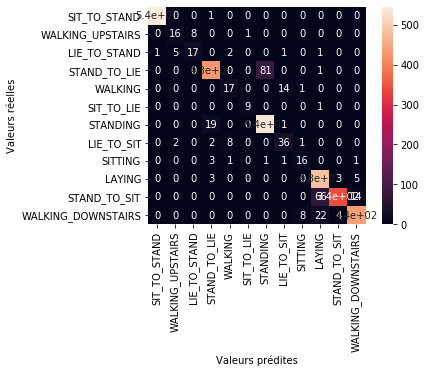

In [15]:
# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

## Sauvegarde du meilleur modèle

In [18]:
with open('model.pkl', 'wb') as file:
    pickle.dump(SVM, file)

## Chargement du modèle

In [19]:
with open('model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)

# On revérifie la précision
print(pickle_model.score(x_test, y_test))

0.9490828589500316
